# Import libraries

In [2]:
import tensorflow as tf
from tensorflow import keras
from keras.utils.vis_utils import plot_model
from sklearn.model_selection import train_test_split


2023-01-11 14:47:44.694643: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
import scipy.io as sio
import os
import numpy as np
import matplotlib.pyplot as plt

## Load cumulative data and train neural network on the combined normalized decorrelation data

In [3]:
cpath = os.getcwd()
path = '/mat files/cumPredictorsTempsAt4Points14Exps.mat'
all_data = sio.loadmat(cpath + path)

In [4]:
all_data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'cumAltDecAt4points', 'cumDecAt4points', 'cumIBSnormAt4points', 'simpleCumDecAt4points', 'temperatureAt4Points'])

In [5]:
cum_dec_4points = all_data['cumDecAt4points']
cum_dec_global_4points = all_data['cumAltDecAt4points']
cum_dec_local_4points = all_data['simpleCumDecAt4points']
cum_IBS_4points = all_data['cumIBSnormAt4points']
temperature_4points = all_data['temperatureAt4Points']

In [6]:
cum_dec_4points.shape

(14, 4, 60)

In [7]:
cum_dec_vec = cum_dec_4points.ravel()
cum_dec_global_vec = cum_dec_global_4points.ravel()
cum_dec_local_vec = cum_dec_local_4points.ravel()
IBS_vec = cum_IBS_4points.ravel()
temperature_vec = temperature_4points.ravel()

/var/folders/mq/2m2rd5h112v8vr5mhrwbt3l80000gn/T/ipykernel_15925/1436322830.py:23: RuntimeWarning: divide by zero encountered in log10
  plt.hist(np.log10(cum_dec_vec), range=[-10,2]);
/var/folders/mq/2m2rd5h112v8vr5mhrwbt3l80000gn/T/ipykernel_15925/1436322830.py:27: RuntimeWarning: divide by zero encountered in log10
  plt.hist(np.log10(cum_dec_global_vec), range=[-10,2]);
/var/folders/mq/2m2rd5h112v8vr5mhrwbt3l80000gn/T/ipykernel_15925/1436322830.py:31: RuntimeWarning: divide by zero encountered in log10
  plt.hist(np.log10(cum_dec_local_vec), range=[-10,2]);
/var/folders/mq/2m2rd5h112v8vr5mhrwbt3l80000gn/T/ipykernel_15925/1436322830.py:35: RuntimeWarning: divide by zero encountered in log10
  plt.hist(np.log10(IBS_vec), range=[-10,6]);


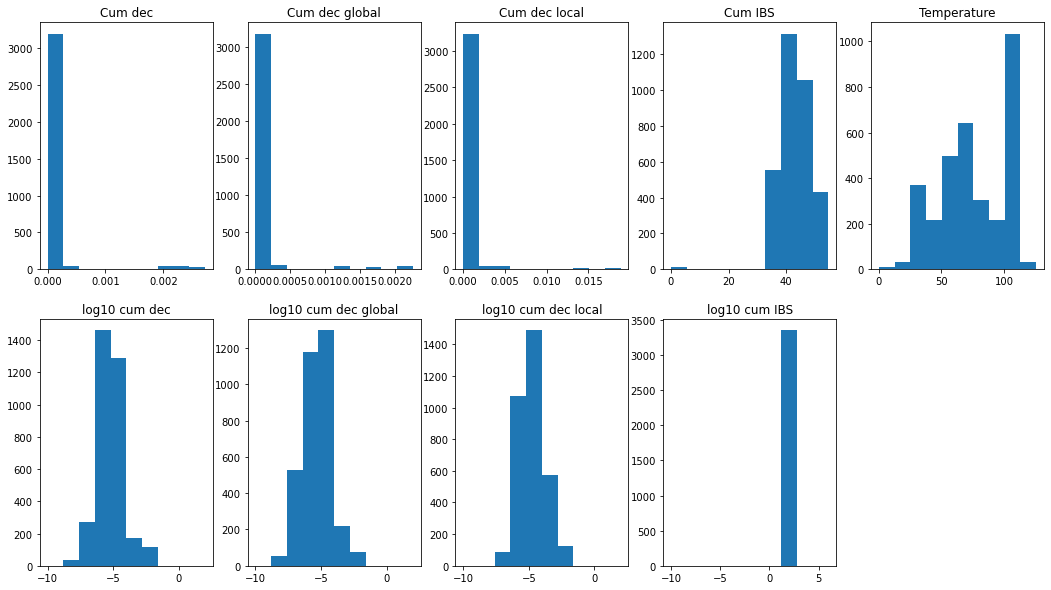

In [284]:
plt.figure(figsize=(18,10))
plt.subplot(2,5,1)
plt.hist(cum_dec_vec);
plt.title('Cum dec')

plt.subplot(2,5,2)
plt.hist(cum_dec_global_vec);
plt.title('Cum dec global')

plt.subplot(2,5,3)
plt.hist(cum_dec_local_vec);
plt.title('Cum dec local')

plt.subplot(2,5,4)
plt.hist(IBS_vec);
plt.title('Cum IBS')

plt.subplot(2,5,5)
plt.hist(temperature_vec);
plt.title('Temperature')

plt.subplot(2,5,6)
plt.hist(np.log10(cum_dec_vec), range=[-10,2]);
plt.title('log10 cum dec')

plt.subplot(2,5,7)
plt.hist(np.log10(cum_dec_global_vec), range=[-10,2]);
plt.title('log10 cum dec global')

plt.subplot(2,5,8)
plt.hist(np.log10(cum_dec_local_vec), range=[-10,2]);
plt.title('log10 cum dec local')

plt.subplot(2,5,9)
plt.hist(np.log10(IBS_vec), range=[-10,6]);
plt.title('log10 cum IBS');


### Clean and normalize the data

In [9]:
cum_dec_4points.shape

(14, 4, 60)

In [10]:
cum_dec_4points = np.transpose(cum_dec_4points,[0,2,1])
temperature_4points = np.transpose(temperature_4points,[0,2,1])

cum_dec_4points.shape

(14, 60, 4)

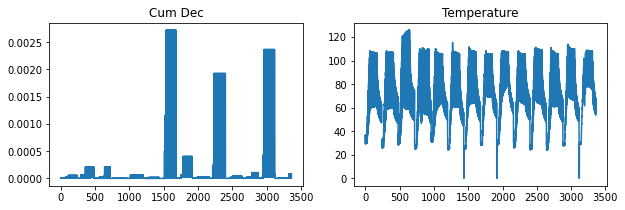

In [11]:
plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
plt.plot(cum_dec_4points.ravel())
plt.title('Cum Dec');
plt.subplot(1,2,2)
plt.plot(temperature_4points.ravel())
plt.title('Temperature');

In [12]:
cum_dec_4points_vec = cum_dec_4points.reshape([14*60,4])
temperature_4points_vec = temperature_4points.reshape([14*60,4])
cum_dec_4points_vec.shape

(840, 4)

In [13]:
# Remove nans
cum_dec_4points_vec = cum_dec_4points_vec[~np.isnan(temperature_4points_vec)].reshape([-1,4])
temperature_4points_vec = temperature_4points_vec[~np.isnan(temperature_4points_vec)].reshape([-1,4])

In [14]:
cum_dec_4points_vec.shape

(839, 4)

/var/folders/mq/2m2rd5h112v8vr5mhrwbt3l80000gn/T/ipykernel_15925/2778154624.py:7: RuntimeWarning: divide by zero encountered in log10
  plt.hist(np.log10(cum_dec_4points_vec),range=[-30,30]);


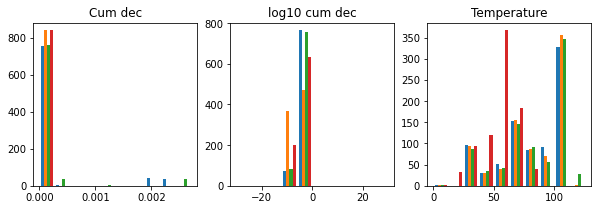

In [15]:
plt.figure(figsize=(10,3))
plt.subplot(1,3,1)
plt.hist(cum_dec_4points_vec);
plt.title('Cum dec');

plt.subplot(1,3,2)
plt.hist(np.log10(cum_dec_4points_vec),range=[-30,30]);
plt.title('log10 cum dec');

plt.subplot(1,3,3)
plt.hist(temperature_4points_vec);
plt.title('Temperature');

In [143]:
cum_dec_log10 = np.log10(cum_dec_4points_vec)
cum_dec_log10 = np.nan_to_num(cum_dec_log10,posinf=0, neginf=-10)
cum_dec_log10 = cum_dec_log10 / abs(cum_dec_log10).max()
cum_dec_log10 = cum_dec_log10 - np.mean(cum_dec_log10)

/var/folders/mq/2m2rd5h112v8vr5mhrwbt3l80000gn/T/ipykernel_15925/221398474.py:1: RuntimeWarning: divide by zero encountered in log10
  cum_dec_log10 = np.log10(cum_dec_4points_vec)


In [146]:
cum_dec_log10.min()

-0.4765312028155805

(array([[  3.,   0.,   0.,  14.,  43.,  39., 357., 219.,  82.,  82.],
        [  3.,   1.,  13.,  26., 172., 387.,  68., 169.,   0.,   0.],
        [  3.,   0.,   2.,   6.,  41., 130., 253., 275.,  86.,  43.],
        [  3.,   0.,   8.,  22.,  89., 277., 273., 143.,  24.,   0.]]),
 array([-0.4765312 , -0.40218824, -0.32784529, -0.25350233, -0.17915937,
        -0.10481641, -0.03047345,  0.0438695 ,  0.11821246,  0.19255542,
         0.26689838]),
 <a list of 4 BarContainer objects>)

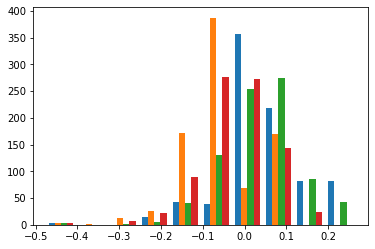

In [148]:
plt.hist(cum_dec_log10);

In [150]:
temperature_norm = temperature_4points_vec / temperature_4points_vec.max()
temperature_norm = temperature_norm - temperature_norm.mean()
temperature_norm.min()

-0.5962808822108233

In [172]:
temp_max = temperature_4points_vec.max()

In [173]:
temp_norm_mean = temperature_norm.mean()

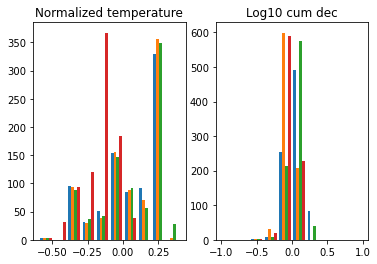

In [152]:
plt.subplot(1,2,1)
plt.hist(temperature_norm);
plt.title('Normalized temperature');
plt.subplot(1,2,2)
plt.hist(cum_dec_log10,range=[-1,1]);
plt.title('Log10 cum dec');

In [153]:
# cum_dec_log10 = np.nan_to_num(cum_dec_log10, posinf=1, neginf=) 
cum_dec_log10.max()

0.26689837817294315

In [163]:
X_train, X_test, Y_train, Y_test = train_test_split(cum_dec_log10, temperature_norm, test_size=0.33, random_state=42)

In [165]:
Y_test.min()

-0.5962808822108233

### Neural network architecture

In [91]:
my_model = keras.Sequential([
    keras.layers.InputLayer(input_shape=(4,)),
    keras.layers.Dense(units=64, activation='relu'),
    keras.layers.Dense(units=128, activation='relu'),
    keras.layers.Dense(units=64, activation='relu'),
    keras.layers.Dense(units=4)
])

In [92]:
print(my_model.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 64)                320       
                                                                 
 dense_13 (Dense)            (None, 128)               8320      
                                                                 
 dense_14 (Dense)            (None, 64)                8256      
                                                                 
 dense_15 (Dense)            (None, 4)                 260       
                                                                 
Total params: 17,156
Trainable params: 17,156
Non-trainable params: 0
_________________________________________________________________
None


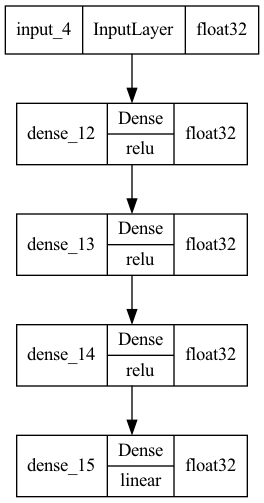

In [93]:
plot_model(my_model, show_dtype=True, show_layer_activations=True)

In [166]:
my_model.compile(optimizer='adam', 
              loss=tf.losses.MeanSquaredError(),
              metrics=['accuracy'])

history = my_model.fit(
    X_train, 
    Y_train,
    batch_size=50,
    epochs=1500, 
    verbose=2,
    validation_split=0.15,
    shuffle=False)

Epoch 1/1500
10/10 - 1s - loss: 4184.4014 - accuracy: 0.4717 - val_loss: 2133.0283 - val_accuracy: 0.2471 - 585ms/epoch - 58ms/step
Epoch 2/1500
10/10 - 0s - loss: 1426.2484 - accuracy: 0.1845 - val_loss: 616.2229 - val_accuracy: 0.0471 - 38ms/epoch - 4ms/step
Epoch 3/1500
10/10 - 0s - loss: 410.6834 - accuracy: 0.0587 - val_loss: 194.3432 - val_accuracy: 0.0353 - 37ms/epoch - 4ms/step
Epoch 4/1500
10/10 - 0s - loss: 143.0754 - accuracy: 0.0440 - val_loss: 84.1562 - val_accuracy: 0.0000e+00 - 37ms/epoch - 4ms/step
Epoch 5/1500
10/10 - 0s - loss: 68.7893 - accuracy: 0.0021 - val_loss: 48.3323 - val_accuracy: 0.0000e+00 - 37ms/epoch - 4ms/step
Epoch 6/1500
10/10 - 0s - loss: 42.4521 - accuracy: 0.0021 - val_loss: 33.5420 - val_accuracy: 0.0000e+00 - 38ms/epoch - 4ms/step
Epoch 7/1500
10/10 - 0s - loss: 31.0011 - accuracy: 0.0000e+00 - val_loss: 26.6049 - val_accuracy: 0.0000e+00 - 38ms/epoch - 4ms/step
Epoch 8/1500
10/10 - 0s - loss: 25.1916 - accuracy: 0.0000e+00 - val_loss: 22.5732 - v

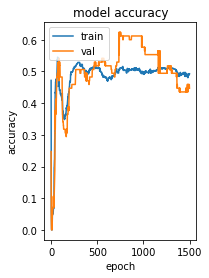

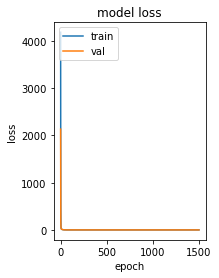

In [167]:
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [168]:
y_predictions = my_model.predict(X_test)
y_predictions

9/9 [==============================] - 0s 1ms/step


array([[ 0.13135123,  0.16057178,  0.13462442, -0.14428553],
       [ 0.19849563,  0.23422453,  0.22861493, -0.06327733],
       [ 0.2072115 ,  0.22913024,  0.2125063 , -0.06871435],
       ...,
       [ 0.15367365,  0.17588612,  0.17308688, -0.0948883 ],
       [ 0.1153847 ,  0.14590988,  0.12715572, -0.15342239],
       [ 0.20472157,  0.23370358,  0.22507381, -0.07991639]],
      dtype=float32)

In [202]:
from sklearn.metrics import median_absolute_error, explained_variance_score, mean_squared_error, accuracy_score

In [178]:
median_absolute_error(Y_test, y_predictions)

0.07600295238877876

In [179]:
explained_variance_score(Y_test, y_predictions)

0.6224737851807106

In [180]:
mean_squared_error(Y_test, y_predictions)

0.013963058678355903

## Load cumulative data and train neural network on the combined and globally normalized decorrelation data

In [181]:
cum_dec_4points = all_data['cumDecAt4points']
cum_dec_global_4points = all_data['cumAltDecAt4points']
cum_dec_local_4points = all_data['simpleCumDecAt4points']
cum_IBS_4points = all_data['cumIBSnormAt4points']
temperature_4points = all_data['temperatureAt4Points']

(840, 4)

### Clean and normalize the data

In [182]:
cum_dec_4points = np.transpose(cum_dec_4points,[0,2,1])
cum_dec_global_4points = np.transpose(cum_dec_global_4points,[0,2,1])
temperature_4points = np.transpose(temperature_4points,[0,2,1])

cum_dec_4points.shape

(14, 60, 4)

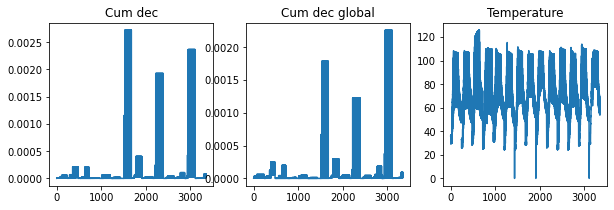

In [183]:
plt.figure(figsize=(10,3))
plt.subplot(1,3,1)
plt.plot(cum_dec_4points.ravel())
plt.title('Cum dec');
plt.subplot(1,3,2)
plt.plot(cum_dec_global_4points.ravel())
plt.title('Cum dec global');
plt.subplot(1,3,3)
plt.plot(temperature_4points.ravel())
plt.title('Temperature');

In [184]:
cum_dec_4points_vec = cum_dec_4points.reshape([14*60,4])
cum_dec_global_4points_vec = cum_dec_global_4points.reshape([14*60,4])
temperature_4points_vec = temperature_4points.reshape([14*60,4])
cum_dec_4points_vec.shape

(840, 4)

In [185]:
cum_dec_4points_vec = cum_dec_4points_vec[~np.isnan(temperature_4points_vec)].reshape([-1,4])
cum_dec_global_4points_vec = cum_dec_global_4points_vec[~np.isnan(temperature_4points_vec)].reshape([-1,4])
temperature_4points_vec = temperature_4points_vec[~np.isnan(temperature_4points_vec)].reshape([-1,4])

/var/folders/mq/2m2rd5h112v8vr5mhrwbt3l80000gn/T/ipykernel_15925/4264171609.py:1: RuntimeWarning: divide by zero encountered in log10
  cum_dec_log10 = np.log10(cum_dec_4points_vec)


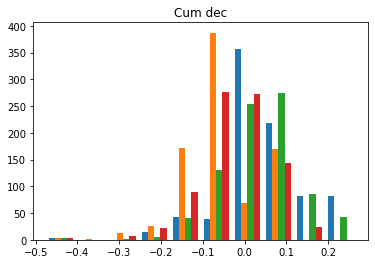

In [230]:
cum_dec_log10 = np.log10(cum_dec_4points_vec)
cum_dec_log10 = np.nan_to_num(cum_dec_log10,posinf=0, neginf=-10)
cum_dec_log10_absmax = abs(cum_dec_log10).max()
cum_dec_log10 = cum_dec_log10 / cum_dec_log10_absmax
cum_dec_log10_mean = np.mean(cum_dec_log10)
cum_dec_log10 = cum_dec_log10 - cum_dec_log10_mean
plt.hist(cum_dec_log10);
plt.title('Cum dec');

/var/folders/mq/2m2rd5h112v8vr5mhrwbt3l80000gn/T/ipykernel_15925/3215316156.py:1: RuntimeWarning: divide by zero encountered in log10
  cum_dec_global_log10 = np.log10(cum_dec_global_4points_vec)


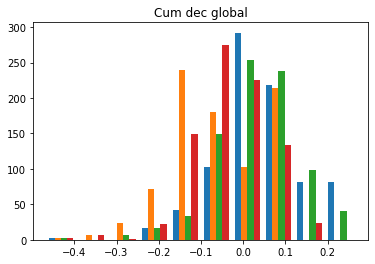

In [188]:
cum_dec_global_log10 = np.log10(cum_dec_global_4points_vec)
cum_dec_global_log10 = np.nan_to_num(cum_dec_global_log10,posinf=0, neginf=-10)
cum_dec_global_log10 = cum_dec_global_log10 / abs(cum_dec_global_log10).max()
cum_dec_global_log10 = cum_dec_global_log10 - np.mean(cum_dec_global_log10)
plt.hist(cum_dec_global_log10);
plt.title('Cum dec global');

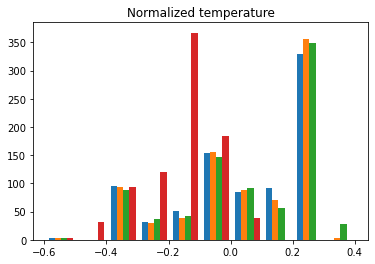

In [189]:
temperature_4points_max = temperature_4points_vec.max()
temperature_norm = temperature_4points_vec / temperature_4points_max
temperature_norm_mean = temperature_norm.mean()
temperature_norm = temperature_norm - temperature_norm_mean
temperature_norm.min()
plt.hist(temperature_norm);
plt.title('Normalized temperature');

In [193]:
cum_dec_comb_glob = np.concatenate((cum_dec_log10, cum_dec_global_log10), axis=1)
cum_dec_comb_glob.shape

(839, 8)

In [194]:
X_train, X_test, Y_train, Y_test = train_test_split(cum_dec_comb_glob, temperature_norm, test_size=0.33, random_state=42)

In [196]:
Y_train.shape

(562, 4)

### Neural network architecture for combined and globally norm. decorr.

In [197]:
my_model2 = keras.Sequential([
    keras.layers.InputLayer(input_shape=(8,)),
    keras.layers.Dense(units=64, activation='relu'),
    keras.layers.Dense(units=128, activation='relu'),
    keras.layers.Dense(units=64, activation='relu'),
    keras.layers.Dense(units=4)
])

print(my_model2.summary())

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 64)                576       
                                                                 
 dense_17 (Dense)            (None, 128)               8320      
                                                                 
 dense_18 (Dense)            (None, 64)                8256      
                                                                 
 dense_19 (Dense)            (None, 4)                 260       
                                                                 
Total params: 17,412
Trainable params: 17,412
Non-trainable params: 0
_________________________________________________________________
None


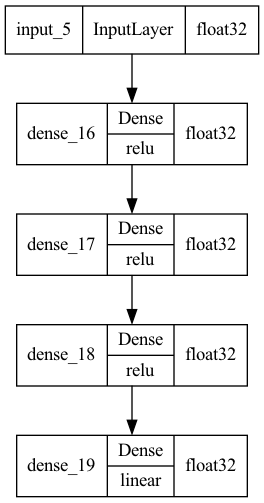

In [198]:
plot_model(my_model2, show_dtype=True, show_layer_activations=True)

In [199]:
my_model2.compile(optimizer='adam', 
              loss=tf.losses.MeanSquaredError(),
              metrics=['accuracy'])

history = my_model2.fit(
    X_train, 
    Y_train,
    batch_size=50,
    epochs=1000, 
    verbose=2,
    validation_split=0.15,
    shuffle=False)

Epoch 1/1000
10/10 - 1s - loss: 0.0361 - accuracy: 0.3124 - val_loss: 0.0258 - val_accuracy: 0.2941 - 603ms/epoch - 60ms/step
Epoch 2/1000
10/10 - 0s - loss: 0.0230 - accuracy: 0.3501 - val_loss: 0.0189 - val_accuracy: 0.3647 - 39ms/epoch - 4ms/step
Epoch 3/1000
10/10 - 0s - loss: 0.0199 - accuracy: 0.4277 - val_loss: 0.0166 - val_accuracy: 0.4235 - 38ms/epoch - 4ms/step
Epoch 4/1000
10/10 - 0s - loss: 0.0182 - accuracy: 0.4591 - val_loss: 0.0158 - val_accuracy: 0.3765 - 37ms/epoch - 4ms/step
Epoch 5/1000
10/10 - 0s - loss: 0.0173 - accuracy: 0.4298 - val_loss: 0.0149 - val_accuracy: 0.4941 - 39ms/epoch - 4ms/step
Epoch 6/1000
10/10 - 0s - loss: 0.0166 - accuracy: 0.5031 - val_loss: 0.0140 - val_accuracy: 0.4235 - 38ms/epoch - 4ms/step
Epoch 7/1000
10/10 - 0s - loss: 0.0161 - accuracy: 0.4843 - val_loss: 0.0135 - val_accuracy: 0.4353 - 38ms/epoch - 4ms/step
Epoch 8/1000
10/10 - 0s - loss: 0.0155 - accuracy: 0.5178 - val_loss: 0.0129 - val_accuracy: 0.4706 - 38ms/epoch - 4ms/step
Epoch 

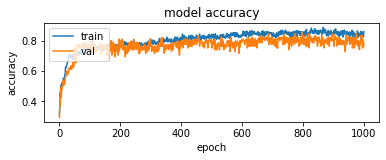

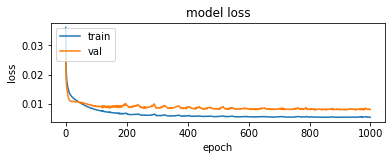

In [227]:
plt.subplot(2,1,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

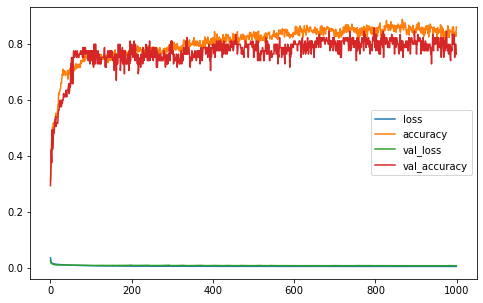

In [219]:
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.show()

In [201]:
y_predictions = my_model2.predict(X_test)
y_predictions

9/9 [==============================] - 0s 1ms/step


array([[ 0.21535455,  0.26741135,  0.21480751, -0.13799405],
       [ 0.20132752,  0.2287987 ,  0.19492963, -0.01870159],
       [ 0.21744703,  0.19683155,  0.23088828, -0.13805005],
       ...,
       [-0.04351505, -0.0380783 , -0.03469572, -0.19092527],
       [ 0.03226277,  0.04971017,  0.04586206, -0.17763582],
       [ 0.24034023,  0.26687503,  0.21689212,  0.0159988 ]],
      dtype=float32)

In [231]:
Y_test_real = (Y_test + temperature_norm_mean) * temperature_4points_max
y_predictions_real = (y_predictions + temperature_norm_mean) * temperature_4points_max
X_test_real = (X_test + cum_dec_log10_mean) * cum_dec_log10_absmax

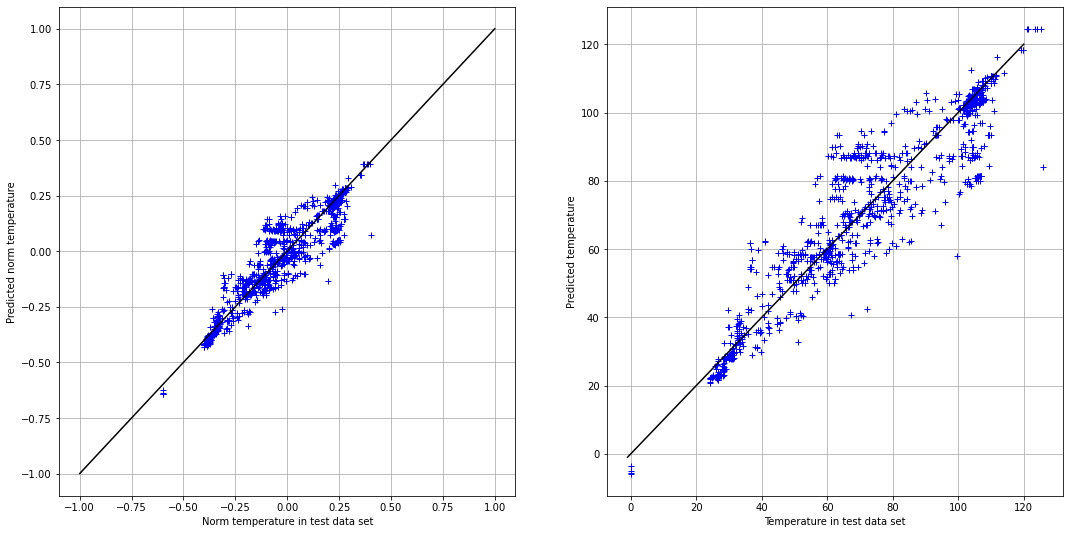

In [281]:
plt.figure(figsize=(18,9))
plt.subplot(1,2,1)
plt.plot(Y_test, y_predictions, 'b+', np.linspace(-1,1,300), np.linspace(-1,1,300), 'k-');
plt.xlabel('Norm temperature in test data set')
plt.ylabel('Predicted norm temperature')
plt.grid()
plt.subplot(1,2,2)
plt.plot(Y_test_real, y_predictions_real, 'b+', np.linspace(-1,120,300), np.linspace(-1,120,300), 'k-');
plt.xlabel('Temperature in test data set')
plt.ylabel('Predicted temperature')
plt.grid()

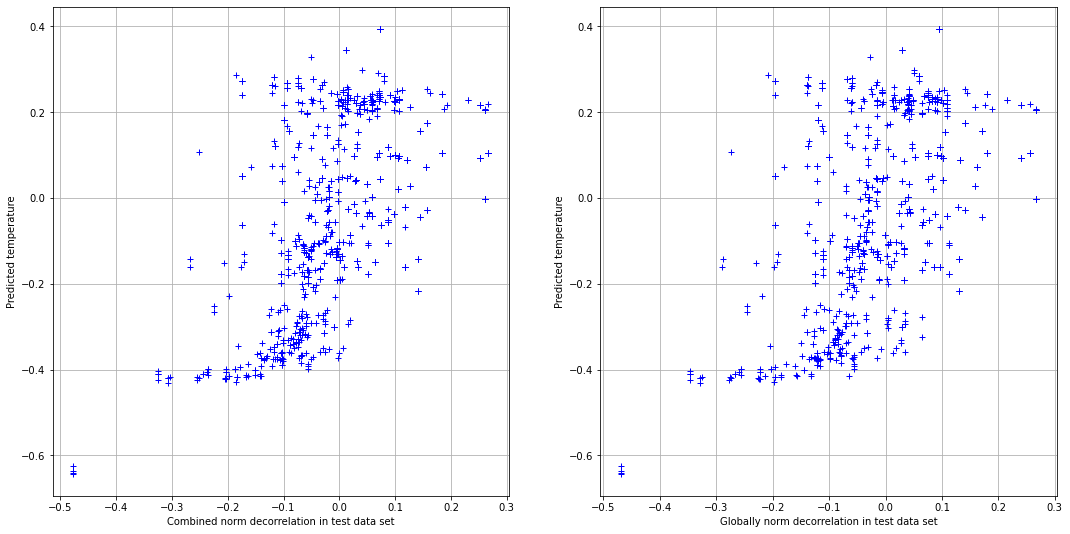

In [277]:
plt.figure(figsize=(18,9))
plt.subplot(1,2,1)
plt.plot(X_test[:,0:4], y_predictions, 'b+');
plt.xlabel('Combined norm decorrelation in test data set')
plt.ylabel('Predicted temperature')
plt.grid()
plt.subplot(1,2,2)
plt.plot(X_test[:,4:], y_predictions, 'b+');
plt.xlabel('Globally norm decorrelation in test data set')
plt.ylabel('Predicted temperature')
plt.grid()

In [224]:
np.mean(abs(y_predictions_real - Y_test_real))

6.761052989715847

In [225]:
my_model2.save('deep_decorrelation_thermometry_combined_global.h5')

## Load instantaneous data

In [4]:
cpath = os.getcwd()
path = '/mat files/instantPredictorsTempsAt4Points14Exps.mat'
all_data_inst = sio.loadmat(cpath + path)

all_data_inst.keys()

dict_keys(['__header__', '__version__', '__globals__', 'IBSAt4Points', 'decAt4points', 'dec_alteNormAt4Points', 'dec_simpleNormAt4Points', 'temperatureAt4Points'])

In [5]:
dec_4points = all_data_inst['decAt4points']
dec_global_4points = all_data_inst['dec_alteNormAt4Points']
dec_local_4points = all_data_inst['dec_simpleNormAt4Points']
IBS_4points = all_data_inst['IBSAt4Points']
temperature_4points = all_data_inst['temperatureAt4Points']

/var/folders/mq/2m2rd5h112v8vr5mhrwbt3l80000gn/T/ipykernel_1429/291169594.py:23: RuntimeWarning: divide by zero encountered in log10
  plt.hist(np.log10(dec_4points.ravel()), range=[-10,2]);
/var/folders/mq/2m2rd5h112v8vr5mhrwbt3l80000gn/T/ipykernel_1429/291169594.py:27: RuntimeWarning: divide by zero encountered in log10
  plt.hist(np.log10(dec_global_4points.ravel()), range=[-10,2]);
/var/folders/mq/2m2rd5h112v8vr5mhrwbt3l80000gn/T/ipykernel_1429/291169594.py:31: RuntimeWarning: divide by zero encountered in log10
  plt.hist(np.log10(dec_local_4points.ravel()), range=[-10,2]);
/var/folders/mq/2m2rd5h112v8vr5mhrwbt3l80000gn/T/ipykernel_1429/291169594.py:35: RuntimeWarning: divide by zero encountered in log10
  plt.hist(np.log10(IBS_4points.ravel()), range=[-10,6]);
/var/folders/mq/2m2rd5h112v8vr5mhrwbt3l80000gn/T/ipykernel_1429/291169594.py:35: RuntimeWarning: invalid value encountered in log10
  plt.hist(np.log10(IBS_4points.ravel()), range=[-10,6]);


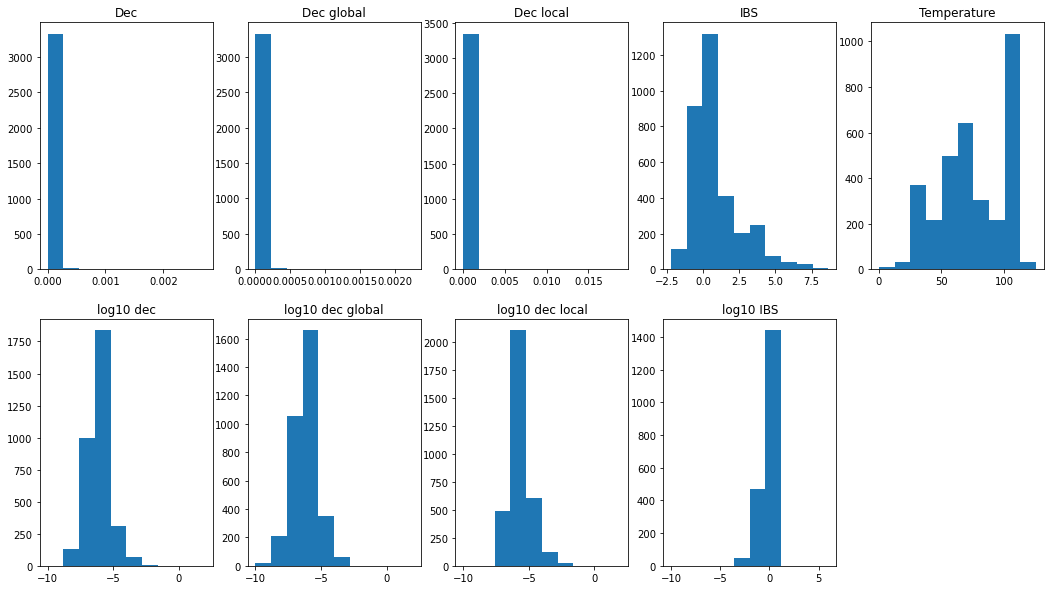

In [6]:
plt.figure(figsize=(18,10))
plt.subplot(2,5,1)
plt.hist(dec_4points.ravel());
plt.title('Dec')

plt.subplot(2,5,2)
plt.hist(dec_global_4points.ravel());
plt.title('Dec global')

plt.subplot(2,5,3)
plt.hist(dec_local_4points.ravel());
plt.title('Dec local')

plt.subplot(2,5,4)
plt.hist(IBS_4points.ravel());
plt.title('IBS')

plt.subplot(2,5,5)
plt.hist(temperature_4points.ravel());
plt.title('Temperature')

plt.subplot(2,5,6)
plt.hist(np.log10(dec_4points.ravel()), range=[-10,2]);
plt.title('log10 dec')

plt.subplot(2,5,7)
plt.hist(np.log10(dec_global_4points.ravel()), range=[-10,2]);
plt.title('log10 dec global')

plt.subplot(2,5,8)
plt.hist(np.log10(dec_local_4points.ravel()), range=[-10,2]);
plt.title('log10 dec local')

plt.subplot(2,5,9)
plt.hist(np.log10(IBS_4points.ravel()), range=[-10,6]);
plt.title('log10 IBS');



### Clean and normalize the data

In [7]:
dec_4points = np.transpose(dec_4points,[0,2,1])
dec_global_4points = np.transpose(dec_global_4points,[0,2,1])
temperature_4points = np.transpose(temperature_4points,[0,2,1])

dec_4points.shape

(14, 60, 4)

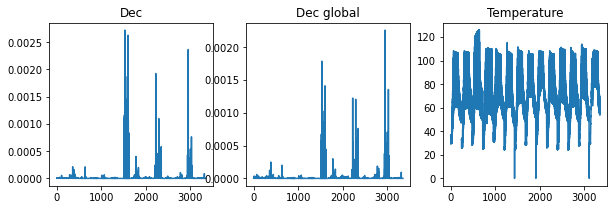

In [8]:
plt.figure(figsize=(10,3))
plt.subplot(1,3,1)
plt.plot(dec_4points.ravel())
plt.title('Dec');
plt.subplot(1,3,2)
plt.plot(dec_global_4points.ravel())
plt.title('Dec global');
plt.subplot(1,3,3)
plt.plot(temperature_4points.ravel())
plt.title('Temperature');

In [9]:
dec_4points = dec_4points.reshape([14*60,4])
dec_global_4points = dec_global_4points.reshape([14*60,4])
temperature_4points = temperature_4points.reshape([14*60,4])
temperature_4points.shape

(840, 4)

In [10]:
# Remove nans
dec_4points = dec_4points[~np.isnan(temperature_4points)].reshape([-1,4])
dec_global_4points = dec_global_4points[~np.isnan(temperature_4points)].reshape([-1,4])
temperature_4points = temperature_4points[~np.isnan(temperature_4points)].reshape([-1,4])

/var/folders/mq/2m2rd5h112v8vr5mhrwbt3l80000gn/T/ipykernel_1429/704176756.py:1: RuntimeWarning: divide by zero encountered in log10
  dec_log10 = np.log10(dec_4points)
/var/folders/mq/2m2rd5h112v8vr5mhrwbt3l80000gn/T/ipykernel_1429/704176756.py:9: RuntimeWarning: divide by zero encountered in log10
  dec_global_log10 = np.log10(dec_global_4points)


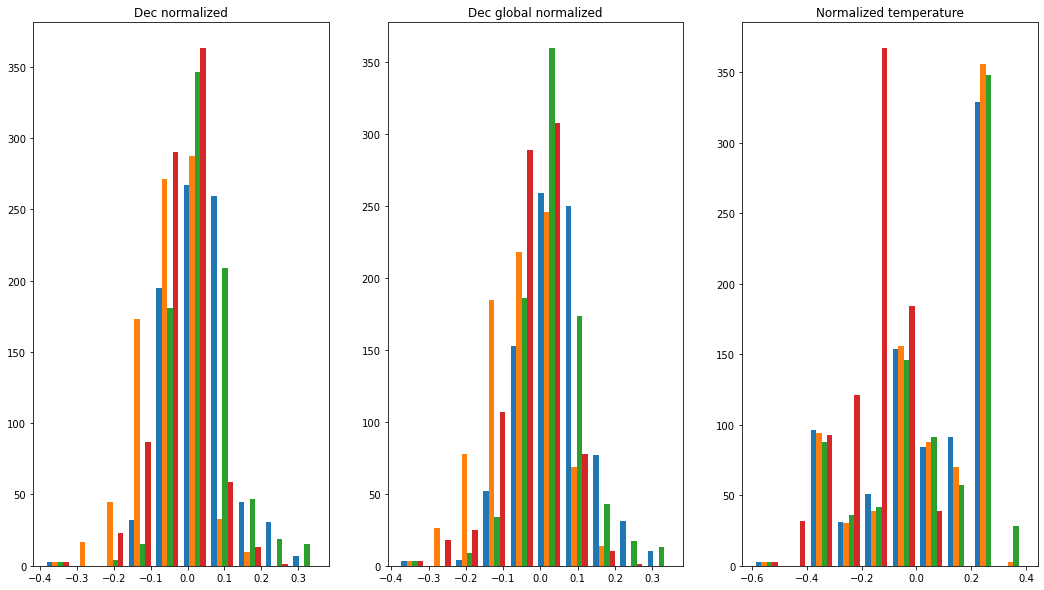

In [11]:
dec_log10 = np.log10(dec_4points)
dec_log10 = np.nan_to_num(dec_log10,posinf=0, neginf=-10)
dec_log10_absmax = abs(dec_log10).max()
dec_log10 = dec_log10 / dec_log10_absmax
dec_log10_mean = np.mean(dec_log10)
dec_log10 = dec_log10 - dec_log10_mean


dec_global_log10 = np.log10(dec_global_4points)
dec_global_log10 = np.nan_to_num(dec_global_log10,posinf=0, neginf=-10)
dec_global_log10_absmax =  abs(dec_global_log10).max()
dec_global_log10 = dec_global_log10 / dec_global_log10_absmax
dec_global_log10_mean = np.mean(dec_global_log10)
dec_global_log10 = dec_global_log10 - dec_global_log10_mean

temperature_4points_max = temperature_4points.max()
temperature_norm = temperature_4points / temperature_4points_max
temperature_norm_mean = temperature_norm.mean()
temperature_norm = temperature_norm - temperature_norm_mean
temperature_norm.min()

plt.figure(figsize=(18,10))
plt.subplot(1,3,1)
plt.hist(dec_log10);
plt.title('Dec normalized');

plt.subplot(1,3,2)
plt.hist(dec_global_log10);
plt.title('Dec global normalized');

plt.subplot(1,3,3)
plt.hist(temperature_norm);
plt.title('Normalized temperature');

In [12]:
dec_comb_glob = np.concatenate((dec_log10, dec_global_log10), axis=1)
dec_comb_glob.shape

(839, 8)

In [13]:
X_train_inst, X_test_inst, Y_train_inst, Y_test_inst = train_test_split(dec_comb_glob, temperature_norm, test_size=0.2, random_state=42)

Y_train_inst.shape

(671, 4)

### Neural network architecture for instantaneous combined and globally norm. decorr.

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 64)                576       
                                                                 
 dense_5 (Dense)             (None, 128)               8320      
                                                                 
 dense_6 (Dense)             (None, 64)                8256      
                                                                 
 dense_7 (Dense)             (None, 4)                 260       
                                                                 
Total params: 17,412
Trainable params: 17,412
Non-trainable params: 0
_________________________________________________________________
None


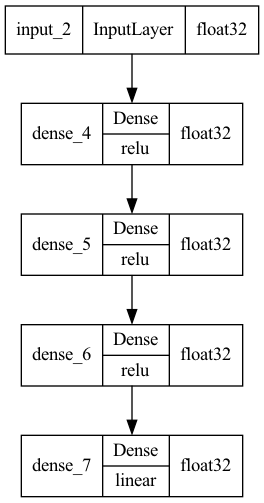

In [15]:
# train the same model, with mse metric
my_model4 = keras.Sequential([
    keras.layers.InputLayer(input_shape=(8,)),
    keras.layers.Dense(units=64, activation='relu'),
    keras.layers.Dense(units=128, activation='relu'),
    keras.layers.Dense(units=64, activation='relu'),
    keras.layers.Dense(units=4)
])

print(my_model4.summary())

plot_model(my_model4, show_dtype=True, show_layer_activations=True)

In [351]:
my_model4.compile(optimizer='adam', 
              loss=tf.losses.MeanSquaredError(),
              metrics=[tf.keras.metrics.RootMeanSquaredError()])

history4 = my_model4.fit(
    X_train_inst, 
    Y_train_inst,
    batch_size=50,
    epochs=100, 
    verbose=2,
    validation_split=0.15,
    shuffle=False)

Epoch 1/100
10/10 - 1s - loss: 0.0396 - root_mean_squared_error: 0.1989 - val_loss: 0.0320 - val_root_mean_squared_error: 0.1788 - 595ms/epoch - 60ms/step
Epoch 2/100
10/10 - 0s - loss: 0.0294 - root_mean_squared_error: 0.1716 - val_loss: 0.0248 - val_root_mean_squared_error: 0.1575 - 40ms/epoch - 4ms/step
Epoch 3/100
10/10 - 0s - loss: 0.0245 - root_mean_squared_error: 0.1565 - val_loss: 0.0235 - val_root_mean_squared_error: 0.1533 - 41ms/epoch - 4ms/step
Epoch 4/100
10/10 - 0s - loss: 0.0221 - root_mean_squared_error: 0.1487 - val_loss: 0.0219 - val_root_mean_squared_error: 0.1479 - 44ms/epoch - 4ms/step
Epoch 5/100
10/10 - 0s - loss: 0.0202 - root_mean_squared_error: 0.1421 - val_loss: 0.0205 - val_root_mean_squared_error: 0.1433 - 40ms/epoch - 4ms/step
Epoch 6/100
10/10 - 0s - loss: 0.0186 - root_mean_squared_error: 0.1366 - val_loss: 0.0193 - val_root_mean_squared_error: 0.1391 - 40ms/epoch - 4ms/step
Epoch 7/100
10/10 - 0s - loss: 0.0176 - root_mean_squared_error: 0.1328 - val_lo

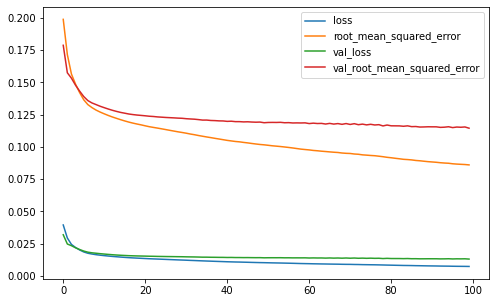

In [352]:
import pandas as pd
pd.DataFrame(history4.history).plot(figsize=(8,5))
plt.show()

9/9 [==============================] - 0s 1ms/step


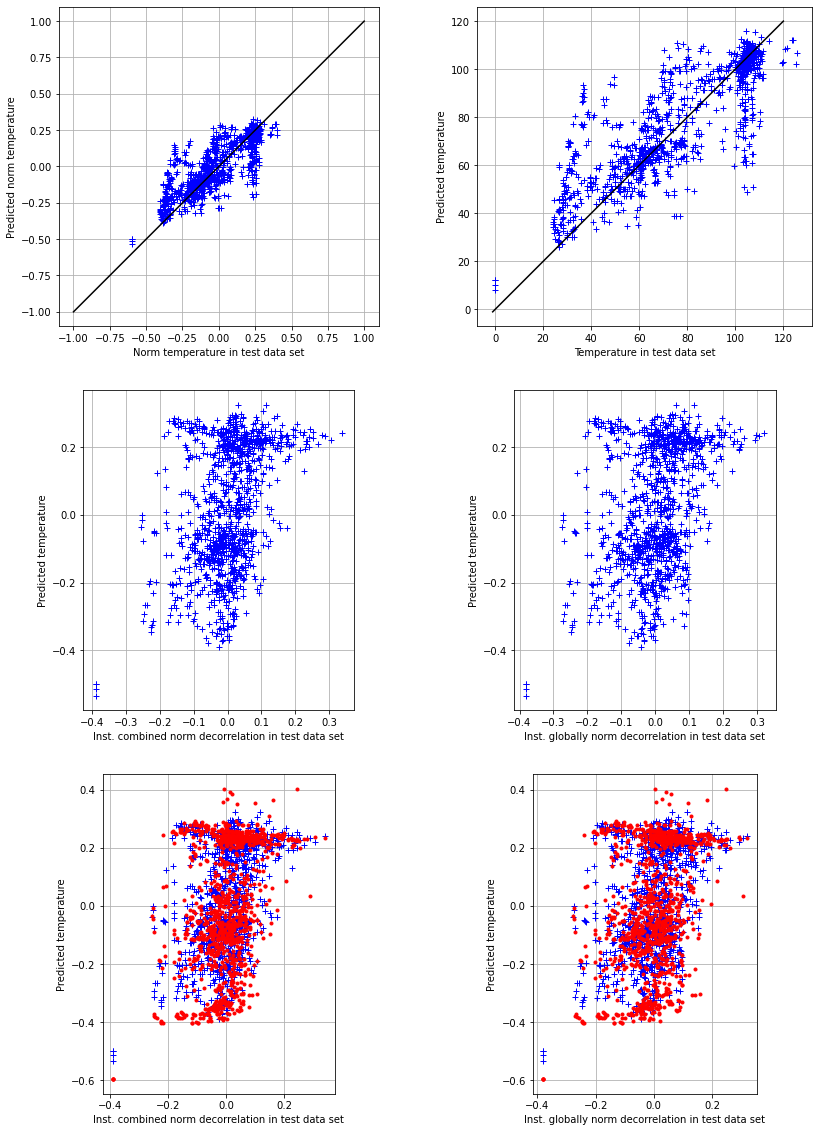

In [353]:
y_predictions_inst = my_model4.predict(X_test_inst)

Y_test_inst_real = (Y_test_inst + temperature_norm_mean) * temperature_4points_max
y_predictions_inst_real = (y_predictions_inst + temperature_norm_mean) * temperature_4points_max
X_test_inst_real = (X_test_inst + dec_log10_mean) * dec_log10_absmax

plt.figure(figsize=(14,20))
plt.subplot(321, aspect='equal')
plt.plot(Y_test_inst, y_predictions_inst, 'b+', np.linspace(-1,1,300), np.linspace(-1,1,300), 'k-');
plt.xlabel('Norm temperature in test data set')
plt.ylabel('Predicted norm temperature')
plt.grid()
plt.subplot(322, aspect='equal')
plt.plot(Y_test_inst_real, y_predictions_inst_real, 'b+', np.linspace(-1,120,300), np.linspace(-1,120,300), 'k-');
plt.xlabel('Temperature in test data set')
plt.ylabel('Predicted temperature')
plt.grid()

plt.subplot(323, aspect='equal')
plt.plot(X_test_inst[:,0:4], y_predictions_inst, 'b+');
plt.xlabel('Inst. combined norm decorrelation in test data set')
plt.ylabel('Predicted temperature')
plt.grid()
plt.subplot(324, aspect='equal')
plt.plot(X_test_inst[:,4:], y_predictions_inst, 'b+');
plt.xlabel('Inst. globally norm decorrelation in test data set')
plt.ylabel('Predicted temperature')
plt.grid()

plt.subplot(325, aspect='equal')
plt.plot(X_test_inst[:,0:4], y_predictions_inst, 'b+', X_test_inst[:,0:4], Y_test_inst, 'r.');
plt.xlabel('Inst. combined norm decorrelation in test data set')
plt.ylabel('Predicted temperature')
plt.grid()
plt.subplot(326, aspect='equal')
plt.plot(X_test_inst[:,4:], y_predictions_inst, 'b+', X_test_inst[:,4:], Y_test_inst, 'r.');
plt.xlabel('Inst. globally norm decorrelation in test data set')
plt.ylabel('Predicted temperature')
plt.grid()

In [355]:
# RMSE in test set in deg celsus
np.sqrt(np.square(Y_test_inst_real-y_predictions_inst_real).mean()) 

15.218309838616133

In [ ]:
# my_model4.save('deep_decorrelation_thermometry_instant_combined_global.h5')

In [362]:
str(Y_test_inst_real[1,])

'[104.075 107.825 103.025  75.1  ]'

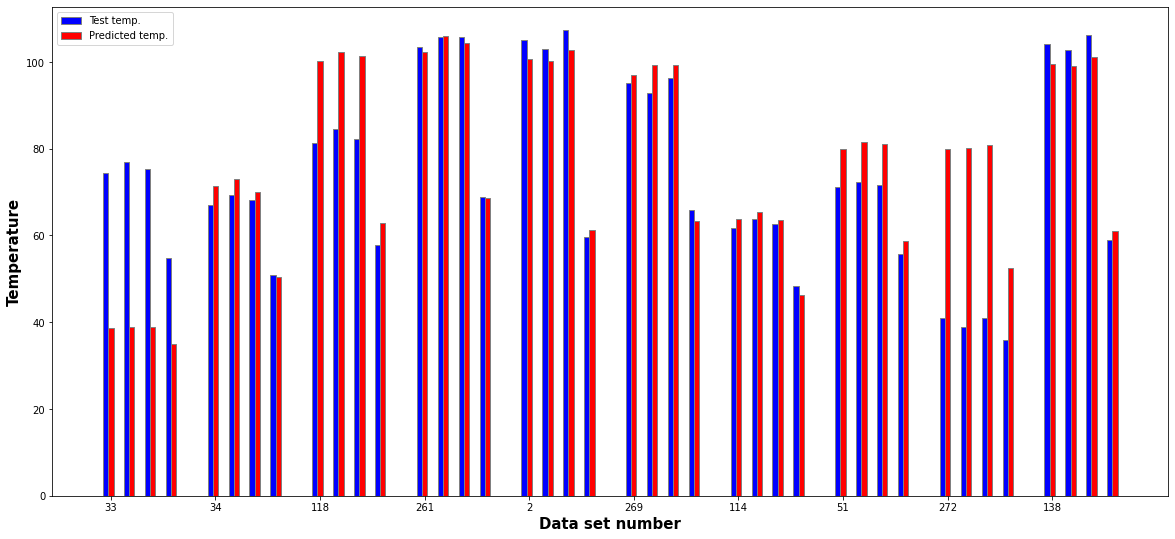

In [394]:
m = 10
thermometers = 4
data_sets_to_disp = np.random.randint(0, Y_test_inst_real.shape[0], m)
barWidth = 0.25
barSeparation = 5

plt.figure(figsize=(20,9))
br1 = np.arange(thermometers)

for i in range(m):
    for j in range(thermometers):
        p1 = plt.bar(br1[j], Y_test_inst_real[data_sets_to_disp[i],j], color ='b', width = barWidth,
            edgecolor ='grey')
        p2 = plt.bar(br1[j]+barWidth, y_predictions_inst_real[data_sets_to_disp[i],j], color ='r', width = barWidth,
            edgecolor ='grey')
    br1 = [x + barSeparation for x in br1]
    
plt.ylabel('Temperature', fontweight ='bold', fontsize = 15)
plt.xlabel('Data set number', fontweight ='bold', fontsize = 15)
plt.xticks([r * barSeparation + barWidth for r in range(m)], [str(y) for y in data_sets_to_disp])
plt.legend((p1[0], p2[0]), ('Test temp.','Predicted temp.'))
plt.show()

In [395]:
a = 33
b = 1
Y_test_inst_real[a,b]-y_predictions_inst_real[a,b]

38.13219731648762

In [432]:
X_test_inst_real[:,0:4] = (X_test_inst[:,0:4] + dec_log10_mean) * dec_log10_absmax
X_test_inst_real[:,4:] = (X_test_inst[:,4:] + dec_global_log10_mean) * dec_global_log10_absmax

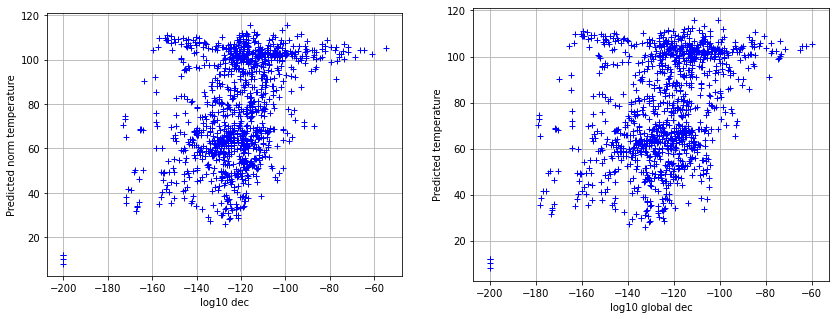

In [435]:
plt.figure(figsize=(14,20))
plt.subplot(121, aspect='equal')
plt.plot(20*X_test_inst_real[:,0:4], y_predictions_inst_real, 'b+');
plt.xlabel('log10 dec')
plt.ylabel('Predicted norm temperature')
plt.grid()
plt.subplot(122, aspect='equal')
plt.plot(20*X_test_inst_real[:,4:], y_predictions_inst_real, 'b+');
plt.xlabel('log10 global dec')
plt.ylabel('Predicted temperature')
plt.grid()

In [431]:
X_test_inst_real.shape

(277, 8)

### Implementing dropout

In [14]:
from datetime import datetime
import tensorboard
%load_ext tensorboard

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                288       
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 64)                2112      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 128)               8320      
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 64)                8

2023-01-11 14:48:40.421646: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


None


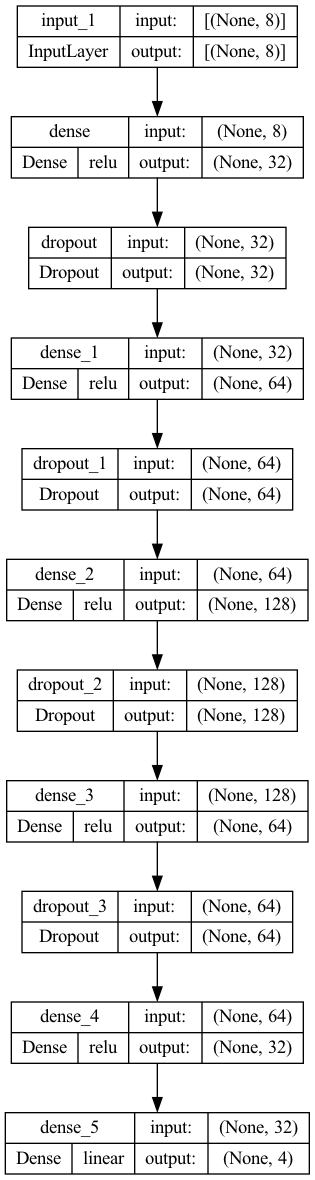

In [15]:
# train the same model, with mse metric
my_model5 = keras.Sequential([
    keras.layers.InputLayer(input_shape=(8,)),
    keras.layers.Dense(units=32, activation='relu', kernel_constraint=keras.constraints.MaxNorm(3)),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(units=64, activation='relu', kernel_constraint=keras.constraints.MaxNorm(3)),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(units=128, activation='relu', kernel_constraint=keras.constraints.MaxNorm(3)),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(units=64, activation='relu', kernel_constraint=keras.constraints.MaxNorm(3)),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(units=32, activation='relu', kernel_constraint=keras.constraints.MaxNorm(3)),
    keras.layers.Dense(units=4)
])

print(my_model5.summary())

plot_model(my_model5, show_shapes=True, show_layer_activations=True)

Epoch 1/210
6/6 - 1s - loss: 0.0367 - root_mean_squared_error: 0.1916 - val_loss: 0.0289 - val_root_mean_squared_error: 0.1701 - 1s/epoch - 199ms/step
Epoch 2/210
6/6 - 0s - loss: 0.0283 - root_mean_squared_error: 0.1683 - val_loss: 0.0248 - val_root_mean_squared_error: 0.1575 - 46ms/epoch - 8ms/step
Epoch 3/210
6/6 - 0s - loss: 0.0237 - root_mean_squared_error: 0.1538 - val_loss: 0.0234 - val_root_mean_squared_error: 0.1530 - 46ms/epoch - 8ms/step
Epoch 4/210
6/6 - 0s - loss: 0.0203 - root_mean_squared_error: 0.1424 - val_loss: 0.0213 - val_root_mean_squared_error: 0.1460 - 45ms/epoch - 7ms/step
Epoch 5/210
6/6 - 0s - loss: 0.0189 - root_mean_squared_error: 0.1376 - val_loss: 0.0206 - val_root_mean_squared_error: 0.1435 - 51ms/epoch - 8ms/step
Epoch 6/210
6/6 - 0s - loss: 0.0184 - root_mean_squared_error: 0.1358 - val_loss: 0.0198 - val_root_mean_squared_error: 0.1406 - 44ms/epoch - 7ms/step
Epoch 7/210
6/6 - 0s - loss: 0.0178 - root_mean_squared_error: 0.1334 - val_loss: 0.0201 - val

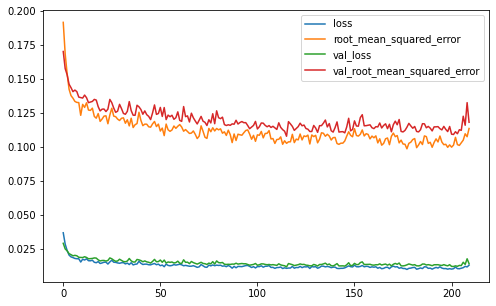

In [16]:
opt = keras.optimizers.Adam(learning_rate=0.01)
my_model5.compile(optimizer=opt, 
              loss=tf.losses.MeanSquaredError(),
              metrics=[tf.keras.metrics.RootMeanSquaredError()])

logdir="logs/fit/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)

history5 = my_model5.fit(
    X_train_inst, 
    Y_train_inst,
    batch_size=100,
    epochs=210, 
    verbose=2,
    validation_split=0.15,
    shuffle=False,
    callbacks=[tensorboard_callback])

import pandas as pd
pd.DataFrame(history5.history).plot(figsize=(8,5))
plt.show()

In [17]:
%tensorboard --logdir logs

In [18]:
y_predictions_inst = my_model5.predict(X_test_inst)

Y_test_inst_real = (Y_test_inst + temperature_norm_mean) * temperature_4points_max
y_predictions_inst_real = (y_predictions_inst + temperature_norm_mean) * temperature_4points_max
X_test_inst_real = (X_test_inst + dec_log10_mean) * dec_log10_absmax

6/6 [==============================] - 0s 1ms/step


15.084555435081102

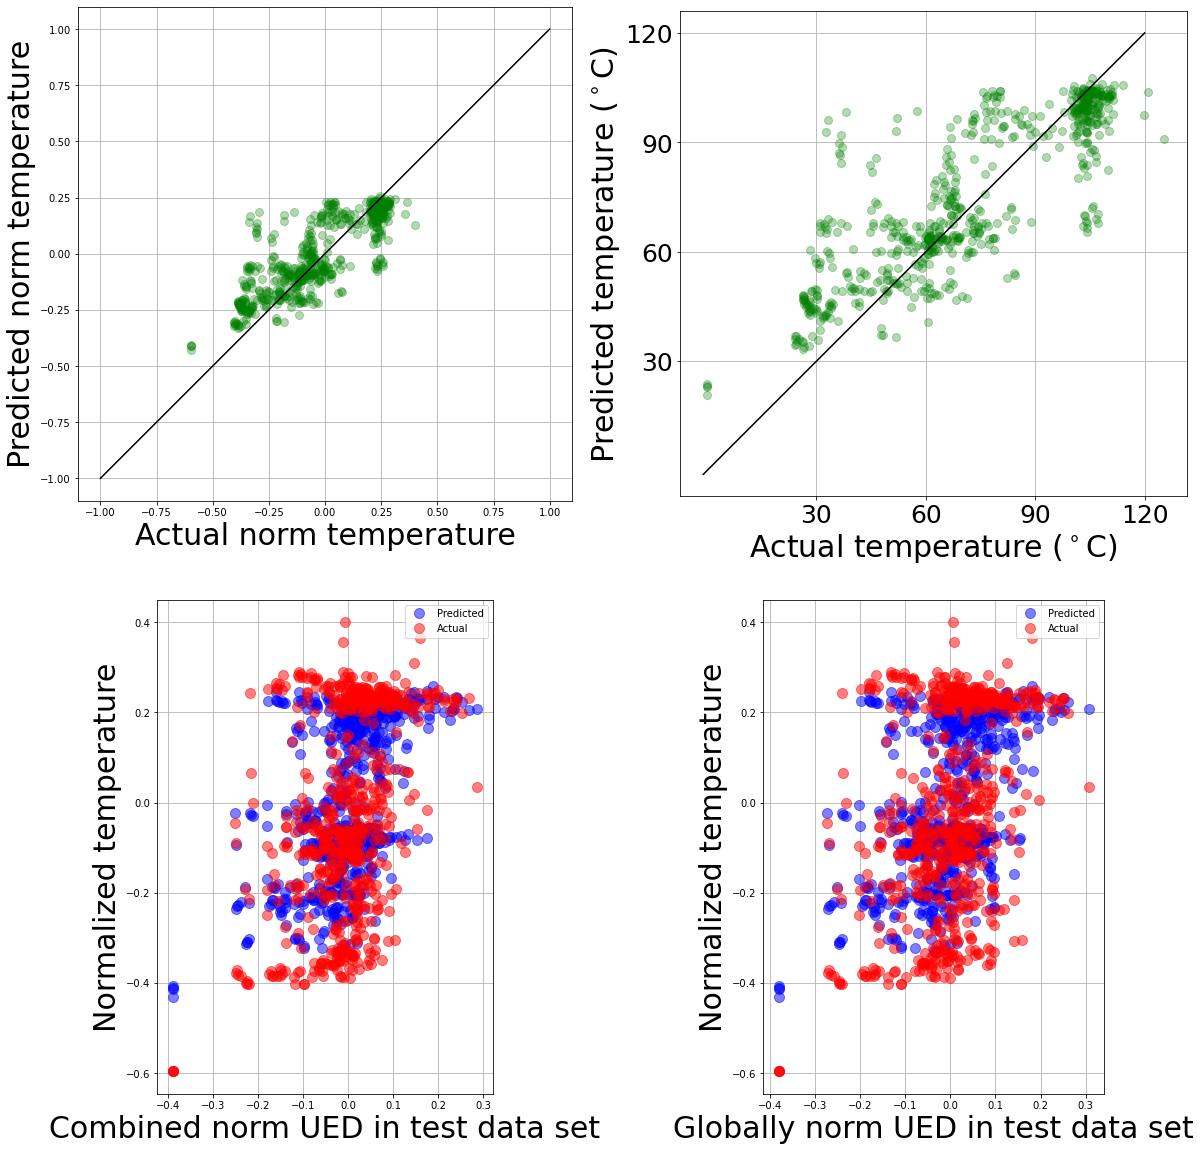

In [19]:
font_size = 30
plt.figure(figsize=(20,20))
plt.subplot(221, aspect='equal')
plt.plot(Y_test_inst, y_predictions_inst, 'go', alpha=0.3, markersize=8);
plt.plot(np.linspace(-1,1,300), np.linspace(-1,1,300), 'k-');
plt.xlabel('Actual norm temperature',fontsize=font_size)
plt.ylabel('Predicted norm temperature',fontsize=font_size)
plt.grid()
plt.subplot(222, aspect='equal')
plt.plot(Y_test_inst_real, y_predictions_inst_real, 'go', alpha=0.3, markersize=8);
plt.plot(np.linspace(-1,120,300), np.linspace(-1,120,300), 'k-');
plt.xlabel('Actual temperature ($^\circ$C)',fontsize=font_size)
plt.ylabel('Predicted temperature ($^\circ$C)',fontsize=font_size)
plt.xticks(ticks=[30, 60, 90, 120], fontsize=font_size-5)
plt.yticks(ticks=[30, 60, 90, 120], fontsize=font_size-5)
plt.grid()

# plt.subplot(323, aspect='equal')
# plt.plot(X_test_inst[:,0:4], y_predictions_inst, 'b+');
# plt.xlabel('Inst. combined norm decorrelation in test data set')
# plt.ylabel('Predicted temperature')
# plt.grid()
# plt.subplot(324, aspect='equal')
# plt.plot(X_test_inst[:,4:], y_predictions_inst, 'b+');
# plt.xlabel('Inst. globally norm decorrelation in test data set')
# plt.ylabel('Predicted temperature')
# plt.grid()

plt.subplot(223, aspect='equal')
plt.plot(X_test_inst[:,0:4].ravel(), y_predictions_inst.ravel(), 'bo', label='Predicted', alpha=0.5, markersize=10);
plt.plot(X_test_inst[:,0:4].ravel(), Y_test_inst.ravel(), 'ro', label='Actual', alpha=0.5, markersize=10);
plt.xlabel('Combined norm UED in test data set',fontsize=font_size)
plt.ylabel('Normalized temperature',fontsize=font_size)
plt.grid()
plt.legend(loc='best')
plt.subplot(224, aspect='equal')
plt.plot(X_test_inst[:,4:].ravel(), y_predictions_inst.ravel(), 'bo', label='Predicted', alpha=0.5, markersize=10);
plt.plot(X_test_inst[:,4:].ravel(), Y_test_inst.ravel(), 'ro', label='Actual', alpha=0.5, markersize=10);
plt.xlabel('Globally norm UED in test data set',fontsize=font_size)
plt.ylabel('Normalized temperature',fontsize=font_size)
plt.grid()
plt.legend(loc='best')

plt.savefig('temp_predictions.png', bbox_inches='tight')

# RMSE in test set in deg celsus
np.sqrt(np.square(Y_test_inst_real-y_predictions_inst_real).mean()) 

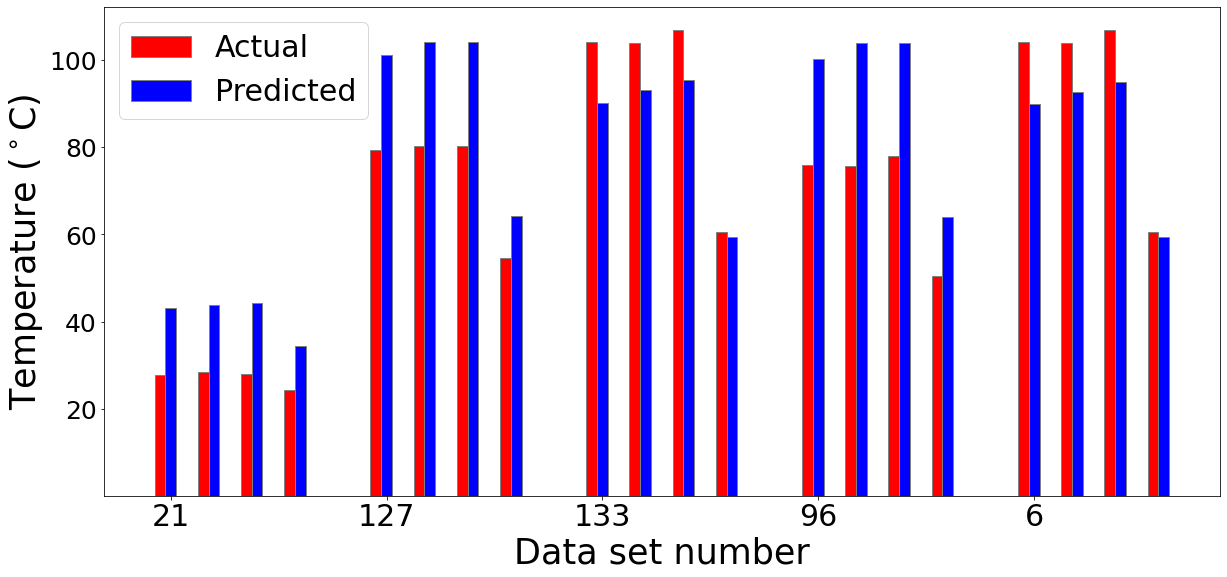

In [24]:
m = 5
thermometers = 4
data_sets_to_disp = np.random.randint(0, Y_test_inst_real.shape[0], m)
barWidth = 0.25
barSeparation = 5

plt.figure(figsize=(20,9))
br1 = np.arange(thermometers)

for i in range(m):
    for j in range(thermometers):
        p1 = plt.bar(br1[j], Y_test_inst_real[data_sets_to_disp[i],j], color ='r', width = barWidth,
            edgecolor ='grey')
        p2 = plt.bar(br1[j]+barWidth, y_predictions_inst_real[data_sets_to_disp[i],j], color ='b', width = barWidth,
            edgecolor ='grey')
    br1 = [x + barSeparation for x in br1]
    
plt.ylabel('Temperature ($^\circ$C)', fontsize=font_size+5)
plt.xlabel('Data set number', fontsize=font_size+5)
plt.xticks([r * barSeparation + barWidth for r in range(m)], [str(y) for y in data_sets_to_disp], fontsize=font_size)
plt.yticks(ticks=np.arange(20, 120, 20), fontsize=font_size-5)
plt.legend((p1[0], p2[0]), ('Actual','Predicted'), fontsize=font_size)
# plt.savefig('temp_predictions_5data.png')
plt.show()

In [23]:
Y_test_inst_real.shape

(168, 4)

In [32]:
# Compute RMSE for temp < 50, 50< <100, >100

In [26]:
Y_train_inst_real = (Y_train_inst + temperature_norm_mean) * temperature_4points_max

In [25]:
np.corrcoef(X_train_inst[:,:4].ravel(),Y_train_inst_real.ravel())

NameError: name 'Y_train_inst_real' is not defined

In [27]:
np.corrcoef(Y_test_inst_real.ravel(), y_predictions_inst_real.ravel())

array([[1.        , 0.84606399],
       [0.84606399, 1.        ]])

In [28]:
import scipy.stats
r, p = scipy.stats.pearsonr(Y_test_inst_real.ravel(), y_predictions_inst_real.ravel())

In [29]:
r

0.846063991562719

In [30]:
p

3.256244052891548e-185

In [70]:
my_model5.save('deep_decorrelation_thermometry_combined_global_dropout.h5')